#  Exploratory data analysis on publications concerning COVID-19 



In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset V4
Dataset is located in Figure_1/Getting-data/output/CORD19id_date.csv, provided by @bmkramer

In [2]:
data_fp = os.path.join('..','Getting-data','output','CORD19id_date.csv')


data = pd.read_csv(data_fp)
print('size of dataset: ', data.shape)
print('The number of publications without publication date: ', pd.isna(data.date).sum())

size of dataset:  (44220, 5)
The number of publications without publication date:  639


In [3]:
def to_date_type(pdate):
    '''
        converts given date column (i.e. pdate) to datetime type
    '''
    try:
          return pd.to_datetime(str(pdate))
    except:
          pass

In [24]:
def agg_data(data , period):
    '''
        aggregate dataset based on the given 'period'
    '''
    data['p'] = data.date.dt.to_period(period).astype(str)
    # # aggregate based on 'created'
    data_agg_all = data.groupby(['p']).size().reset_index(name='count')
    
    return data_agg_all

def plot_publications(data_agg_all, title='', start_period='', end_period='', xlabel='', ylabel='', figsize_x=10, figsize_y=5, filename = '', isWeekly=False):
    '''
        plot a line chart for the given period
    '''
    

    cond = (data_agg_all['p']!='NaT')
    cond = cond & (data_agg_all['p']>= start_period) if start_period != '' else cond
    cond = cond & (data_agg_all['p']<= end_period) if end_period != '' else cond
        
    data_agg_cond = data_agg_all[cond].copy()
    data_agg_cond['count_running_total'] = data_agg_cond['count'].cumsum()

        
    # Initialize the figure
    plt.style.use('seaborn-whitegrid') 

    plt.figure(figsize=(figsize_x,figsize_y), dpi=300)
    
    
    if isWeekly:
        plt.xticks(np.arange(len(data_agg_cond['p'])),[x[-8:] for x in data_agg_cond['p']] ,rotation=90)
    else:
        plt.xticks(rotation=90)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Plot the lineplot
    plt.plot(data_agg_cond['p'], data_agg_cond['count_running_total'], marker='', color='olive', 
             linewidth=1.9, alpha=0.9, label='Cumulative # of publications', linestyle='dashed')
    # Plot the lineplot
    plt.plot(data_agg_cond['p'], data_agg_cond['count'], marker='', color='skyblue', 
             linewidth=1.9, alpha=0.9, label='Exact # of publications')
    
    
    plt.legend()
               
    if filename != '':
        plt.savefig(filename, dpi=300)


In [25]:
# convert 'date' column to datetime type
data['date']= data.apply(lambda x:to_date_type(x['date']),axis=1)

### The number of COVID-19 publications on weekly basis

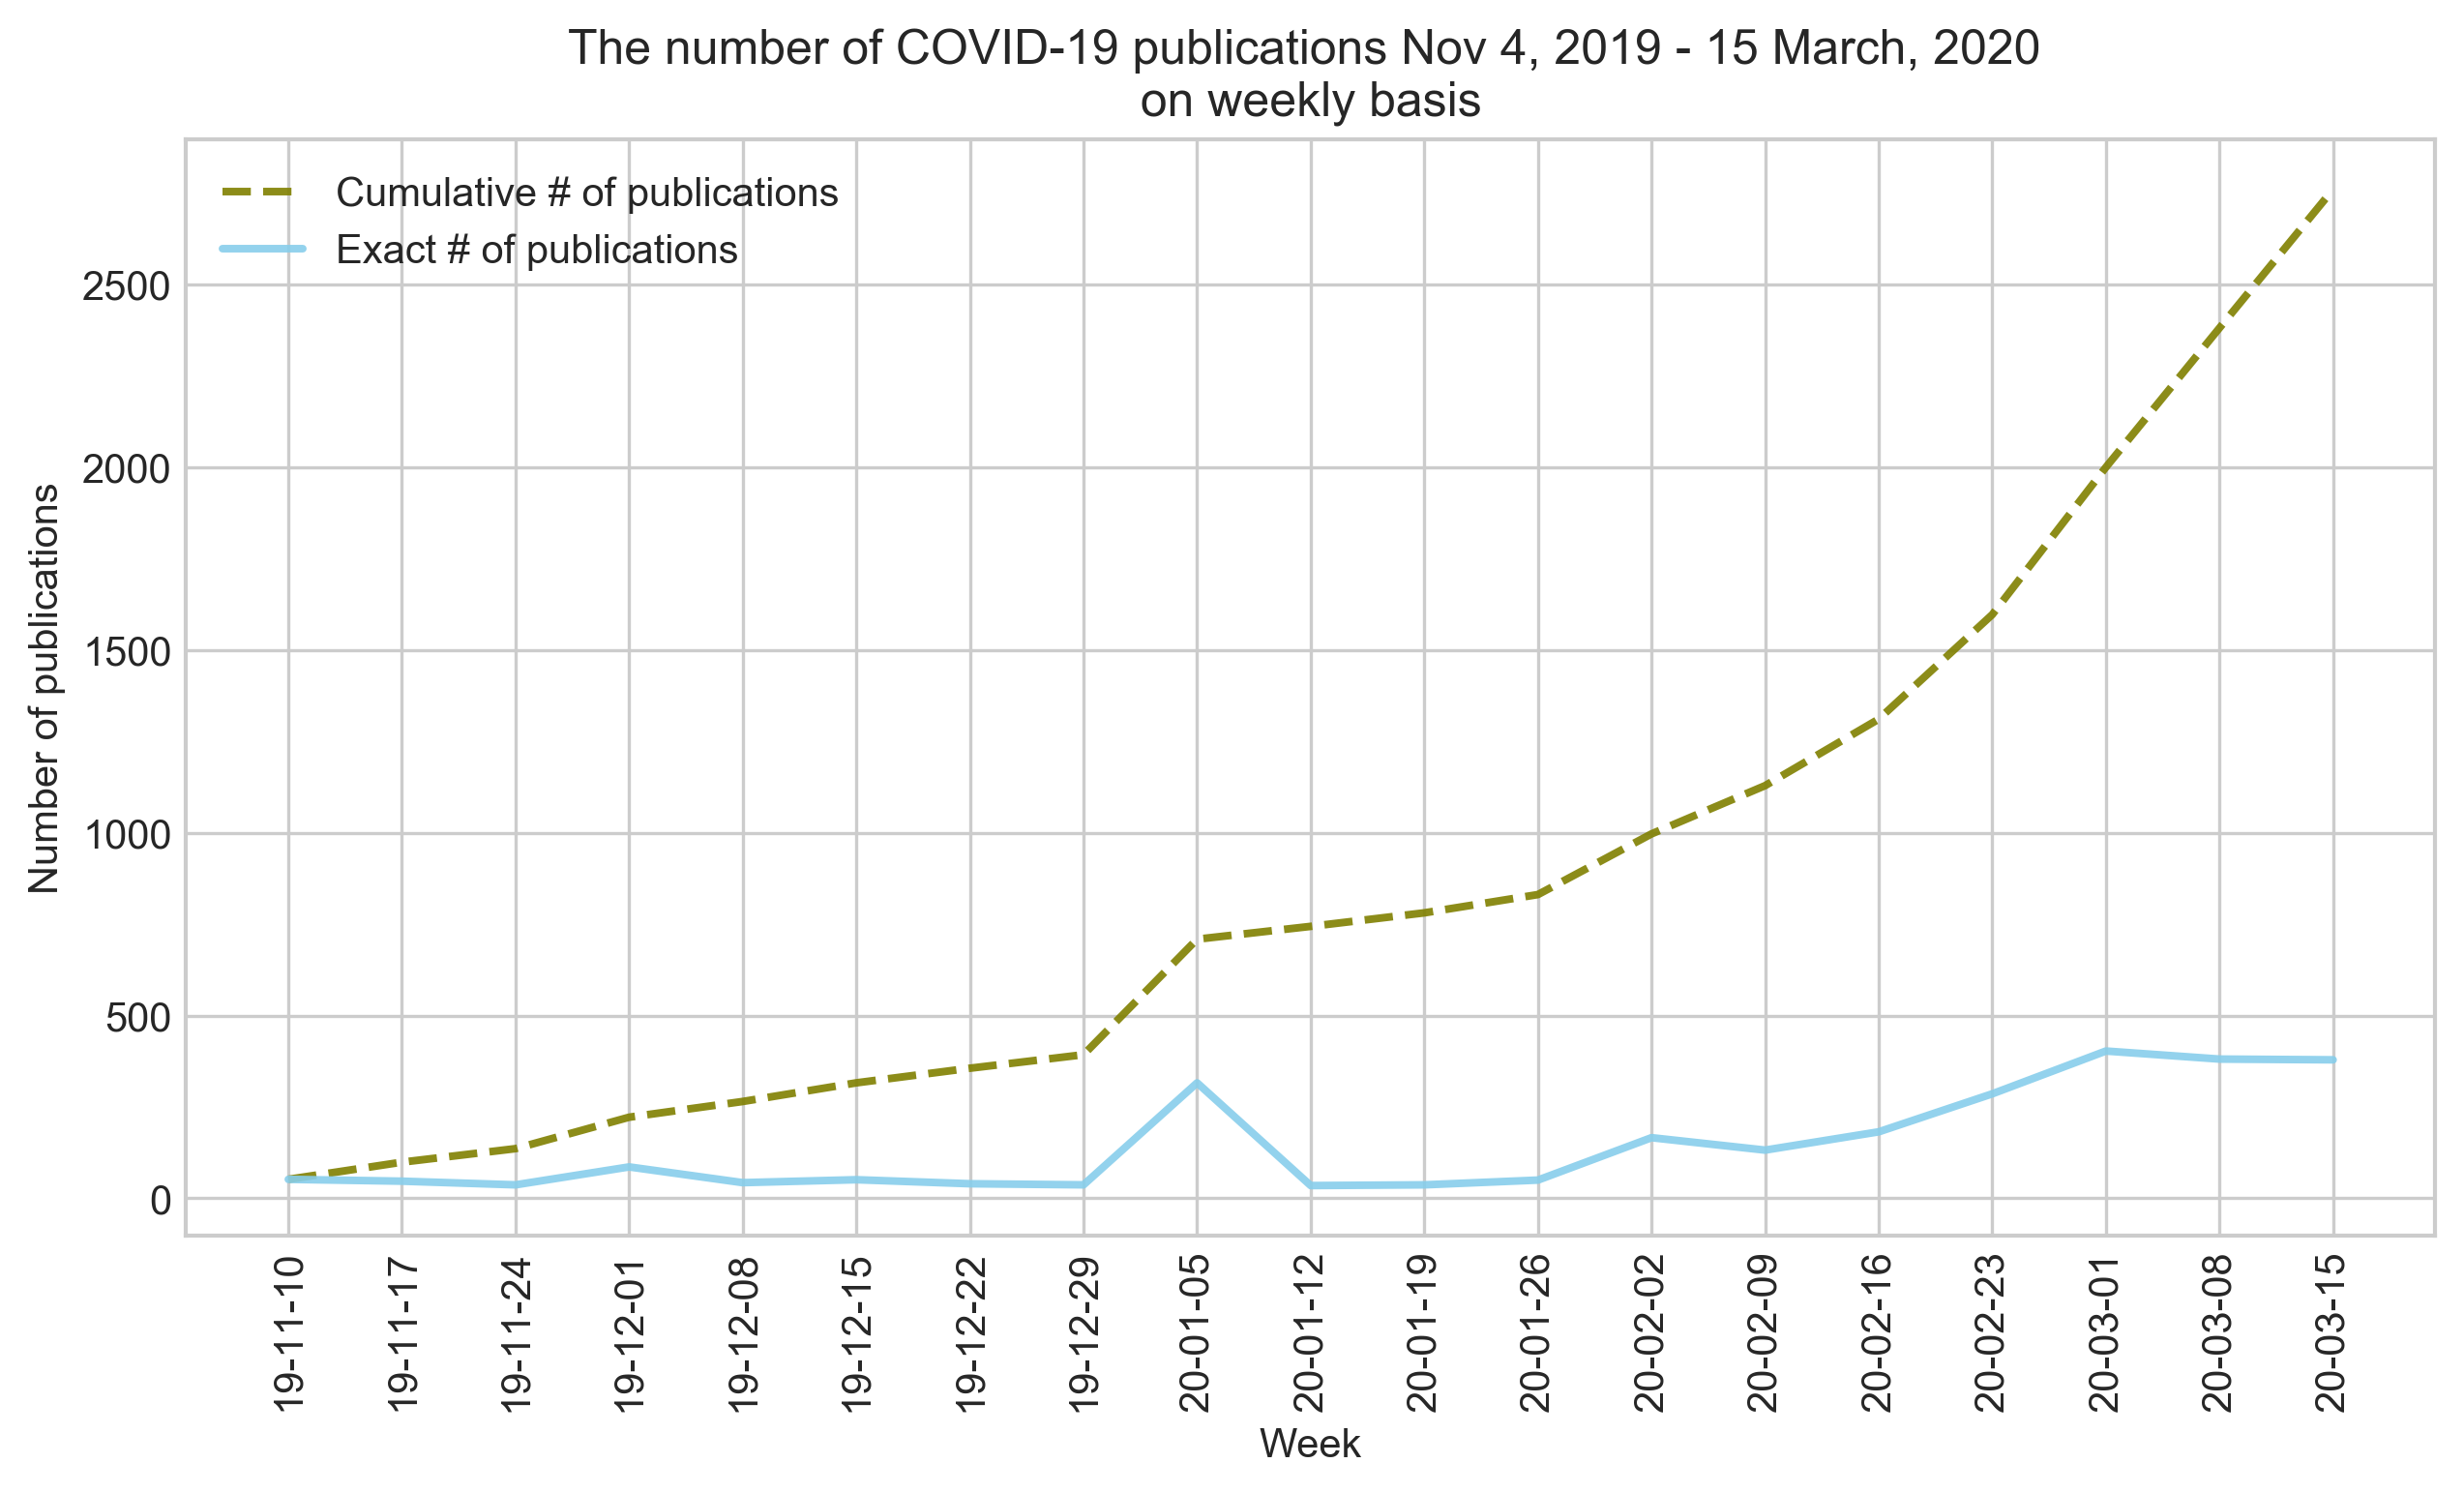

In [26]:
data_agg_all = agg_data(data , 'W')
plot_publications(data_agg_all, 
                  title= 'The number of COVID-19 publications Nov 4, 2019 - 15 March, 2020 \n on weekly basis ', 
                  start_period='2019-11-04/2019-11-10', end_period='2020-03-09/2020-03-15', 
                  xlabel ='Week', ylabel= 'Number of publications', figsize_x=10, figsize_y=5, filename = 'pub_num_weekly.png', isWeekly=True)